In [1]:
import numpy
import pandas
import os
import sys

In [2]:
def ARC(inp_data1, inp_data2):
    try:
        assert type(inp_data1) == type(inp_data2)
        assert type(inp_data1) == numpy.ndarray or type(inp_data1) == pandas.core.frame.DataFrame or type(
            inp_data1) == pandas.core.series.Series or type(inp_data1) == list

        assert type(inp_data2) == numpy.ndarray or type(inp_data2) == pandas.core.frame.DataFrame or type(
            inp_data2) == pandas.core.series.Series or type(inp_data2) == list
        if type(inp_data1) is not list:
            assert len(inp_data1.shape) == 1 and len(inp_data2.shape) == 1
        assert len(inp_data1) == len(inp_data2)
        arc = []
        for i in range(2, len(inp_data1)):
            if type(inp_data1) == numpy.ndarray or type(inp_data1) == list:
                arc.append(numpy.corrcoef(inp_data1[0:i], inp_data2[0:i])[0][1])
            elif type(inp_data1) == pandas.core.series.Series:
                arc.append(numpy.corrcoef(inp_data1.iloc[0:i], inp_data2.iloc[0:i])[0][1])
            else:
                break
        return numpy.array(arc)
    except Exception as e:
        print(e.__traceback__.tb_lineno, e)

In [3]:
def cor_during_time(inp_data1, inp_data2, time_period):
    try:
        assert type(inp_data1) == type(inp_data2)
        assert type(inp_data1) == numpy.ndarray or type(inp_data1) == pandas.core.frame.DataFrame or type(
            inp_data1) == pandas.core.series.Series or type(inp_data1) == list

        assert type(inp_data2) == numpy.ndarray or type(inp_data2) == pandas.core.frame.DataFrame or type(
            inp_data2) == pandas.core.series.Series or type(inp_data2) == list
        if type(inp_data1) is not list:
            assert len(inp_data1.shape) == 1 and len(inp_data2.shape) == 1
        assert len(inp_data1) == len(inp_data2)
        c_d_t = []
        for i in range(len(inp_data1) - time_period):
            if type(inp_data1) == numpy.ndarray or type(inp_data1) == list:
                c_d_t.append(numpy.corrcoef(inp_data1[i:i + time_period], inp_data2[i:i + time_period])[0][1])
            elif type(inp_data1) == pandas.core.series.Series:
                c_d_t.append(numpy.corrcoef(inp_data1.iloc[i:i + time_period], inp_data2.iloc[i:i + time_period])[0][1])
            else:
                break
        return numpy.array(c_d_t)
    except Exception as e:
        print(e.__traceback__.tb_lineno, e)

In [4]:
def intersect(inp_data1, inp_data2):
    try:
        assert type(inp_data1) == type(inp_data2)
        assert type(inp_data1) == numpy.ndarray or type(inp_data1) == pandas.core.frame.DataFrame or type(
            inp_data1) == pandas.core.series.Series or type(inp_data1) == list or type(
            inp_data1) == pandas.core.indexes.range.RangeIndex or type(inp_data1) == pandas.core.indexes.base.Index
        if type(inp_data1) is not list:
            assert len(inp_data1.shape) == 1 and len(inp_data2.shape) == 1
        sect = []
        if len(inp_data1) > len(inp_data2):
            #print(1)
            for i in inp_data1:
                if i in inp_data2:
                    sect.append(i)

        else:
            #print(2)
            for i in inp_data2:
                if i in inp_data1:
                    sect.append(i)

        return numpy.array(sect)
    except Exception as e:
        print(e.__traceback__.tb_lineno, e)

In [28]:
def exp_change(inp_columns):
    try:
        assert type(inp_columns) == pandas.core.frame.DataFrame or type(
            inp_columns) == pandas.core.series.Series or type(
            inp_columns) == numpy.ndarray or type(inp_columns) == list
        #inp_columns2 = inp_columns[:]
        if type(inp_columns) == pandas.core.frame.DataFrame or type(inp_columns) == pandas.core.series.Series:
            inp_columns2 = inp_columns.values
        else:
            inp_columns2 = inp_columns[:]
        exp_change_dt = []
        first = 0
        for i in range(len(inp_columns2)):
            if first == 0:
                if str(inp_columns2[i]) != 'nan':
                    first = i
                    break

        j = first
        k = first + 1
        for i in range(first, len(inp_columns) - 1):
            if str(inp_columns[j]) != 'nan' and str(inp_columns[k]) != 'nan':
                if k - j == 1:
                    exp_change_dt.append(inp_columns[k] / inp_columns[j])
                    j += 1
                    k += 1
                elif k - j > 1:
                    exp_change_dt.append((inp_columns[k] / inp_columns[j]) ** (1 / (k - j)))
                    j = k
                    k += 1
            elif str(inp_columns[j]) != 'nan' and str(inp_columns[k]) == 'nan':
                k += 1
        return numpy.array(exp_change_dt)
    except Exception as e:
        print(e.__traceback__.tb_lineno, e.__str__())


In [90]:
#type([]) == list

In [91]:
#numpy.random.randint(0, 100, 1000)[0:100]

In [92]:
#a = pandas.DataFrame(numpy.random.randint(0, 100, (5, 5)))
#a

In [93]:
#type(a) == pandas.core.frame.DataFrame

In [94]:
#len(a.shape)

In [95]:
#type(a[0])

In [96]:
#a.iloc[:, :2]

In [97]:
#type(a.index)

In [98]:
#a.index = ['a', 'b', 'c', 'd', 'e']

In [99]:
#type(a.index)

In [100]:
#b = numpy.array([])

In [101]:
#for i in range(100):
#    b.resize((b.shape[0] + 1,))
#    b.put(-1, i)

In [102]:
#b

In [103]:
#c = [i for i in range(100)]

In [104]:
#sys.getsizeof(b)

In [105]:
#sys.getsizeof(c)

In [6]:
import finpy_tse as tse
import yfinance as yf

In [7]:
a = tse.get_price_history('فزر', ignore_date=True, double_date=True)

In [8]:
a

,Date,Open,High,Low,Close,Final,Volume,Value,No,Ticker,Name,Market
J-Date,,,,,,,,,,,,
1400-11-20,2022-02-09,17726,21666,17726,17800,21429,299999591,6428779475028,1264932,فزر,پویا زرکان آق دره,فرابورس
1400-11-23,2022-02-12,22500,22500,22500,22500,22500,5647336,127065060000,29757,فزر,پویا زرکان آق دره,فرابورس
1400-11-24,2022-02-13,23600,23600,23600,23600,23600,8205025,193638590000,34375,فزر,پویا زرکان آق دره,فرابورس
1400-11-25,2022-02-14,24750,24750,24750,24750,24750,8782700,217371825000,38520,فزر,پویا زرکان آق دره,فرابورس
1400-11-27,2022-02-16,25950,25950,24850,25300,25700,129477173,3326995414950,526252,فزر,پویا زرکان آق دره,فرابورس
...,...,...,...,...,...,...,...,...,...,...,...,...
1402-11-21,2024-02-10,49750,50800,49650,50100,50100,8650666,433344125450,3571,فزر,پویا زرکان آق دره,فرابورس
1402-11-29,2024-02-18,45900,45900,41400,42100,42000,7020661,295019529400,3829,فزر,پویا زرکان آق دره,فرابورس
1402-11-30,2024-02-19,42000,42700,41600,41900,42050,7041926,295990700150,2775,فزر,پویا زرکان آق دره,فرابورس


In [9]:
b = yf.download('GC=F', interval='1D')

[*********************100%%**********************]  1 of 1 completed


In [25]:
#b

In [10]:
b.reset_index(inplace=True)

In [11]:
b

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0
...,...,...,...,...,...,...,...
5887,2024-02-16,2005.000000,2011.500000,1996.500000,2011.500000,2011.500000,32
5888,2024-02-19,2015.599976,2015.599976,2015.599976,2015.599976,2015.599976,32
5889,2024-02-20,2015.599976,2029.000000,2015.599976,2027.500000,2027.500000,1326
5890,2024-02-21,2028.199951,2028.199951,2022.300049,2022.300049,2022.300049,1326


In [12]:
#a.Date[0]

In [13]:
#b.Date[0]

In [14]:
ind = intersect(b.Date.values, a.Date.values)

In [15]:
a.index = a.Date
b.index = b.Date

In [16]:
a_sect = a.loc[ind, :]
b_sect = b.loc[ind, :]

In [17]:
a_sect

,Date,Open,High,Low,Close,Final,Volume,Value,No,Ticker,Name,Market
Date,,,,,,,,,,,,
2022-02-09,2022-02-09,17726,21666,17726,17800,21429,299999591,6428779475028,1264932,فزر,پویا زرکان آق دره,فرابورس
2022-02-14,2022-02-14,24750,24750,24750,24750,24750,8782700,217371825000,38520,فزر,پویا زرکان آق دره,فرابورس
2022-02-16,2022-02-16,25950,25950,24850,25300,25700,129477173,3326995414950,526252,فزر,پویا زرکان آق دره,فرابورس
2022-02-22,2022-02-22,27500,27500,25700,26800,26600,37125603,987770396550,49793,فزر,پویا زرکان آق دره,فرابورس
2022-02-23,2022-02-23,27100,27900,26600,27900,27650,27198007,752457380300,36475,فزر,پویا زرکان آق دره,فرابورس
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-06,2024-02-06,48450,48500,48050,48350,48300,3226785,155781413700,1589,فزر,پویا زرکان آق دره,فرابورس
2024-02-07,2024-02-07,48500,49850,48300,49750,48900,5218395,255286379950,1936,فزر,پویا زرکان آق دره,فرابورس
2024-02-19,2024-02-19,42000,42700,41600,41900,42050,7041926,295990700150,2775,فزر,پویا زرکان آق دره,فرابورس


In [18]:
b_sect

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2022-02-09,2022-02-09,1825.400024,1835.199951,1825.300049,1835.199951,1835.199951,683
2022-02-14,2022-02-14,1861.800049,1870.599976,1854.599976,1868.000000,1868.000000,79
2022-02-16,2022-02-16,1858.699951,1870.199951,1856.300049,1870.199951,1870.199951,34
2022-02-22,2022-02-22,1908.099976,1912.000000,1890.800049,1906.099976,1906.099976,173
2022-02-23,2022-02-23,1896.599976,1910.599976,1895.699951,1909.199951,1909.199951,73
...,...,...,...,...,...,...,...
2024-02-06,2024-02-06,2025.900024,2037.300049,2025.900024,2034.500000,2034.500000,249
2024-02-07,2024-02-07,2032.800049,2039.500000,2032.699951,2035.199951,2035.199951,71
2024-02-19,2024-02-19,2015.599976,2015.599976,2015.599976,2015.599976,2015.599976,32


In [19]:
ARC(a_sect.Close.values, b_sect.Close.values)

array([ 1.        ,  0.99995307,  0.90654457,  0.92668405,  0.92235773,
        0.90550497,  0.60379451,  0.57260657,  0.6007169 ,  0.61278403,
        0.60931328,  0.60235092,  0.5877803 ,  0.5849941 ,  0.57701065,
        0.56417493,  0.55824659,  0.56384341,  0.55677463,  0.55762549,
        0.56700093,  0.57186438,  0.57543617,  0.50771486,  0.43984942,
        0.36922599,  0.27682965,  0.14344991,  0.00181777, -0.10648589,
       -0.22820868, -0.31635157, -0.39049332, -0.39176623, -0.38036693,
       -0.36428033, -0.3465577 , -0.31422132, -0.2988939 , -0.28968938,
       -0.29666413, -0.28776353, -0.27531679, -0.26658706, -0.2530813 ,
       -0.22589188, -0.2006593 , -0.1743598 , -0.12448448, -0.06047985,
        0.01705716,  0.07890608,  0.12614863,  0.17909534,  0.22189925,
        0.27084212,  0.30876294,  0.33975033,  0.35962139,  0.37044194,
        0.37973498,  0.39209469,  0.40538681,  0.42628232,  0.44263413,
        0.45711601,  0.46892012,  0.48194614,  0.49580665,  0.50

In [20]:
import matplotlib.pyplot as plt

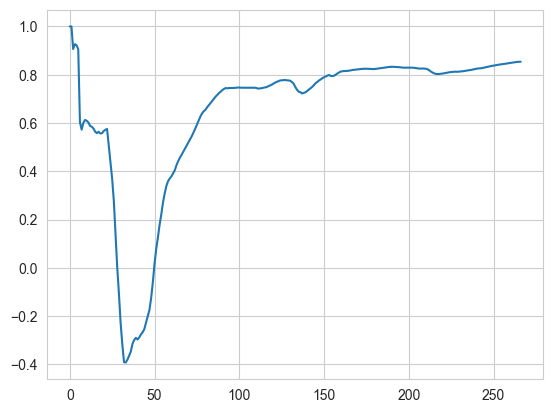

In [21]:
plt.plot(ARC(a_sect.Close.values, b_sect.Close.values))

In [22]:
cor_during_time(a_sect.Close.values, b_sect.Close.values, 20)

array([ 0.55677463,  0.35596204,  0.21621302, -0.05758576, -0.1766975 ,
       -0.35063832, -0.40541732, -0.52072242, -0.56076267, -0.69623176,
       -0.78248692, -0.79358879, -0.84526874, -0.90454206, -0.9304746 ,
       -0.90633755, -0.8370956 , -0.7588468 , -0.68235271, -0.5680985 ,
       -0.48227071, -0.42106602, -0.39237403, -0.29652681, -0.17724307,
       -0.14971802, -0.18000423, -0.14726233, -0.09821186, -0.09780955,
        0.08220464,  0.17609354,  0.38983948,  0.55041395,  0.84334602,
        0.85643207,  0.86145194,  0.86381336,  0.8710516 ,  0.89389817,
        0.85190969,  0.78541344,  0.72361025,  0.67865836,  0.6262604 ,
        0.5624767 ,  0.44947192,  0.33636923,  0.15137102, -0.16729648,
       -0.30392294, -0.32081986, -0.30124874, -0.21553016, -0.13537962,
        0.09920908,  0.44779311,  0.5742621 ,  0.66175883,  0.76796069,
        0.80035227,  0.77315532,  0.69140344,  0.70251842,  0.70138637,
        0.70824467,  0.7227719 ,  0.73266067,  0.70725063,  0.68

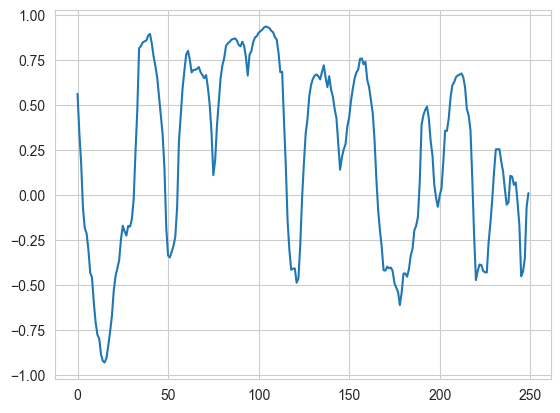

In [23]:
plt.plot(cor_during_time(a_sect.Close.values, b_sect.Close.values, 19))

In [24]:
c = b['Open'].reset_index()

In [25]:
c

,Date,Open
0,2000-08-30,273.899994
1,2000-08-31,274.799988
2,2000-09-01,277.000000
3,2000-09-05,275.799988
4,2000-09-06,274.200012
...,...,...
5887,2024-02-16,2005.000000
5888,2024-02-19,2015.599976
5889,2024-02-20,2015.599976
5890,2024-02-21,2028.199951


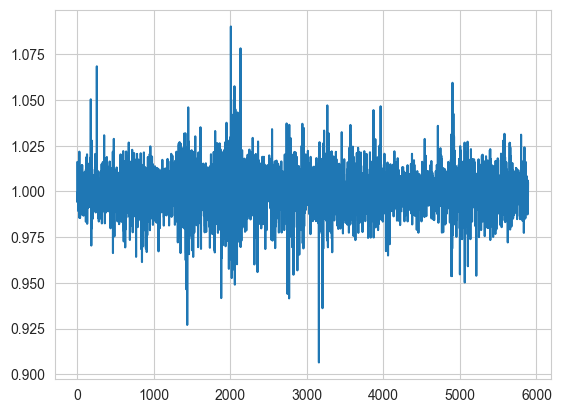

In [31]:
plt.plot(exp_change(b['Close'].values))

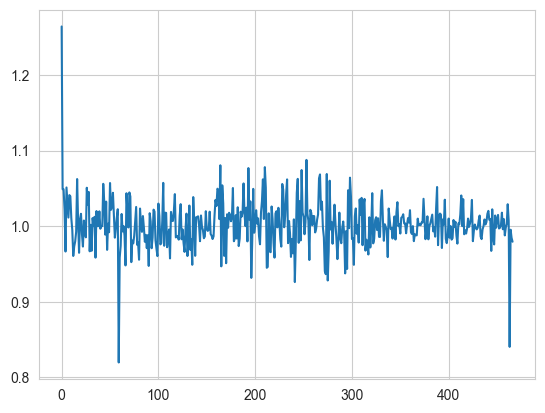

In [32]:
plt.plot(exp_change(a['Close']))

In [109]:
len([0])

TypeError: object of type 'int' has no len()